<a href="https://colab.research.google.com/github/Idzhar16/Capstone/blob/main/capstonekatanyama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip "/content/drive/MyDrive/Dataset_Capstone/coba.zip" -d "/content"

Archive:  /content/drive/MyDrive/Dataset_Capstone/coba.zip
replace /content/coba/aqua1.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/coba/aqua1.jpeg  
replace /content/coba/aqua10.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/coba/aqua10.jpeg  
  inflating: /content/coba/aqua2.jpeg  
  inflating: /content/coba/aqua3.jpeg  
  inflating: /content/coba/aqua4.jpeg  
  inflating: /content/coba/aqua5.jpeg  
  inflating: /content/coba/aqua6.jpeg  
  inflating: /content/coba/aqua7.jpeg  
  inflating: /content/coba/aqua8.jpeg  
  inflating: /content/coba/aqua9.jpeg  
  inflating: /content/coba/coca cola1.jpeg  
  inflating: /content/coba/coca cola10.jpeg  
  inflating: /content/coba/coca cola2.jpeg  
  inflating: /content/coba/coca cola3.jpeg  
  inflating: /content/coba/coca cola4.jpeg  
  inflating: /content/coba/coca cola5.jpeg  
  inflating: /content/coba/coca cola6.jpeg  
  inflating: /content/coba/coca cola7.jpeg  
  inflating: /content/coba/coc

# Split Train and Validation

In [3]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [11]:
# Specify the paths to original dataset and the destination directory
original_dataset_path = 'coba/'
destination_path = '/content/dataset'

# Get a list of all subdirectories in the original dataset path
class_directories = os.listdir(original_dataset_path)
train_split_ratio = 0.8
print(class_directories)

['coca cola2.jpeg', 'aqua4.jpeg', 'pocari1.jpeg', 'aqua5.jpeg', 'aqua1.jpeg', 'pocari8.jpeg', 'aqua3.jpeg', 'coca cola4.jpeg', 'coca cola8.jpeg', 'mizone1.jpeg', 'pocari10.jpeg', 'pocari5.jpeg', 'mizone7.jpeg', 'pocari7.jpeg', 'aqua2.jpeg', 'teh botol3.jpeg', 'aqua10.jpeg', 'aqua7.jpeg', 'pulpy10.jpeg', 'coca cola5.jpeg', 'coca cola1.jpeg', 'pulpy7.jpeg', 'coca cola3.jpeg', 'teh botol10.jpeg', 'pulpy8.jpeg', 'pulpy6.jpeg', 'teh botol8.jpeg', 'mizone2.jpeg', 'mizone10.jpeg', 'coca cola6.jpeg', 'mizone8.jpeg', 'teh botol5.jpeg', 'teh botol9.jpeg', 'teh botol4.jpeg', 'pocari6.jpeg', 'pocari9.jpeg', 'pulpy3.jpeg', 'mizone9.jpeg', 'aqua8.jpeg', 'teh botol1.jpeg', 'aqua9.jpeg', 'teh botol7.jpeg', 'pulpy1.jpeg', 'aqua6.jpeg', 'mizone5.jpeg', 'coca cola9.jpeg', 'teh botol6.jpeg', 'mizone3.jpeg', 'coca cola10.jpeg', 'pocari3.jpeg', 'pulpy2.jpeg', 'pocari4.jpeg', 'coca cola7.jpeg', 'pulpy5.jpeg', 'mizone4.jpeg', 'mizone6.jpeg', 'pulpy9.jpeg', 'pulpy4.jpeg', 'teh botol2.jpeg', 'pocari2.jpeg']


In [12]:
class_dict = {}
for i, class_directory in enumerate(class_directories):
    class_path = os.path.join(original_dataset_path, class_directory)

    # Check if the item in the directory is a directory itself
    if os.path.isdir(class_path):
        class_dict[i] = class_directory
        # Create a destination directory for the class in the new structure
        # Create a destination directory for the class in the new structure
        destination_train_class_path = os.path.join(destination_path, 'train', class_directory)
        os.makedirs(destination_train_class_path, exist_ok=True)

        destination_validation_class_path = os.path.join(destination_path, 'validation', class_directory)
        os.makedirs(destination_validation_class_path, exist_ok=True)

        # Get a list of all image files in the class directory
        image_files = os.listdir(class_path)

        # Shuffle the image files randomly
        random.shuffle(image_files)

        # Calculate the split index based on the split ratio
        split_index = int(train_split_ratio * len(image_files))

        # Split the image files into train and validation sets
        train_files = image_files[:split_index]
        validation_files = image_files[split_index:]

        # Move each train image file to the corresponding class directory in the train split
        for train_file in train_files:
            image_path = os.path.join(class_path, train_file)
            destination_image_path = os.path.join(destination_train_class_path, train_file)
            shutil.copy2(image_path, destination_image_path)

        # Move each validation image file to the corresponding class directory in the validation split
        for validation_file in validation_files:
            image_path = os.path.join(class_path, validation_file)
            destination_image_path = os.path.join(destination_validation_class_path, validation_file)
            shutil.copy2(image_path, destination_image_path)

print('Dataset reorganized and split successfully!')

Dataset reorganized and split successfully!


# Preprocess

In [14]:
PATH = os.path.join("/content/drive/MyDrive/Dataset_Capstone/dataset")
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 60 files belonging to 6 classes.


In [15]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 18 files belonging to 6 classes.


In [16]:
class_names = train_dataset.class_names
print(class_names)

['aqua', 'coca cola', 'mizone', 'pocari sweet', 'pulpy ', 'teh botol']


In [17]:
# Save Classname in txt file
with open('class_names.txt', 'w') as f:
    for name in class_names:
        f.write(name + '\n')

print(class_names)

['aqua', 'coca cola', 'mizone', 'pocari sweet', 'pulpy ', 'teh botol']


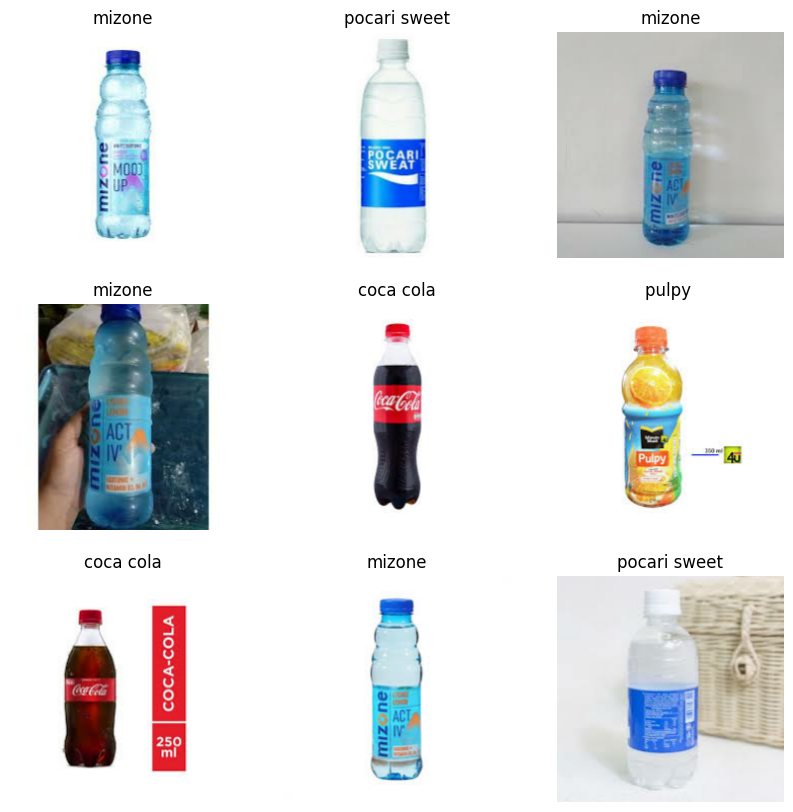

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [20]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 1
Number of test batches: 0


In [21]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [22]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2),
  tf.keras.layers.RandomBrightness(0.2),
])

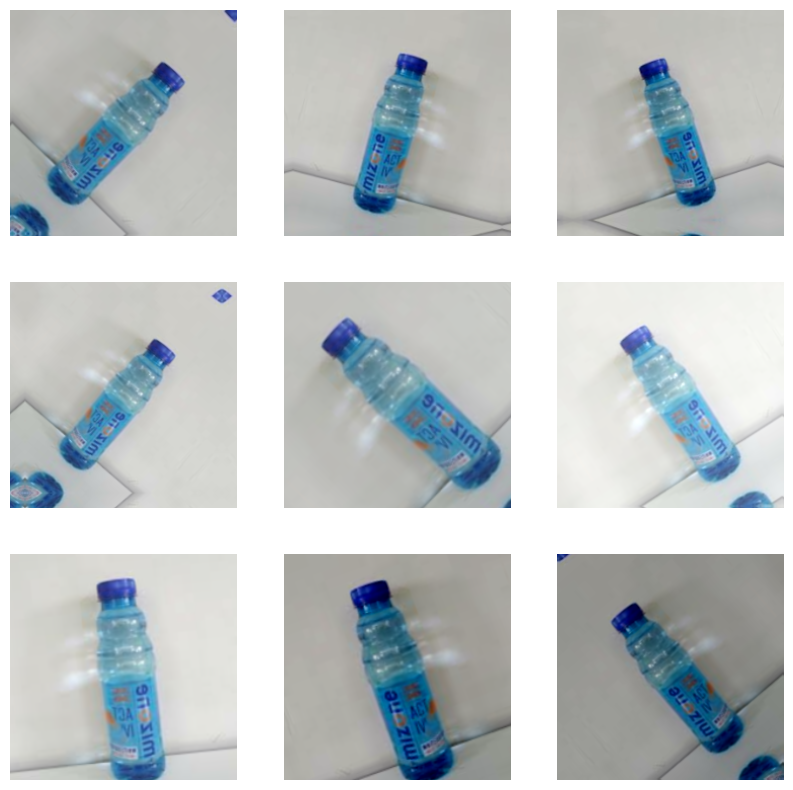

In [23]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [24]:
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./255, offset=-1)

# Create and Training Model

In [25]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.EfficientNetV2M(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

214201816/214201816 [==============================] - 1s 0us/step


In [26]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [27]:
base_model.trainable = False

In [28]:
base_model.summary()

Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 24)         648       ['rescaling_1[0][0]']         
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 24)         96        ['stem_conv[0][0]']           
 n)                                                                                

In [29]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [30]:
prediction_layer = tf.keras.layers.Dense(len(class_names))
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 6)


In [31]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [32]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 6)                 7686  

In [34]:
len(model.trainable_variables)

2

In [35]:
initial_epochs = 100
loss0, accuracy0 = model.evaluate(validation_dataset)

1/1 [==============================] - 14s 14s/step - loss: 1.7679 - accuracy: 0.2778


In [36]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.77
initial accuracy: 0.28


In [37]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min')
callback_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor="val_loss",
                            factor=0.25,
                            patience=1,
                            verbose=1,
                            min_lr=1e-7
                        )

In [38]:
with tf.device('/GPU:0'):
    history = model.fit(train_dataset,
                      epochs=initial_epochs,
                      validation_data=validation_dataset,
                      callbacks=[early_stopping, callback_reduce_lr])

Epoch 1/100
2/2 [==============================] - 30s 4s/step - loss: 1.7896 - accuracy: 0.2500 - val_loss: 1.6848 - val_accuracy: 0.3889 - lr: 0.0010
Epoch 2/100
2/2 [==============================] - 1s 821ms/step - loss: 1.6318 - accuracy: 0.3667 - val_loss: 1.5962 - val_accuracy: 0.3889 - lr: 0.0010
Epoch 3/100
2/2 [==============================] - 1s 731ms/step - loss: 1.4580 - accuracy: 0.5667 - val_loss: 1.5139 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
2/2 [==============================] - 1s 825ms/step - loss: 1.3549 - accuracy: 0.6167 - val_loss: 1.4374 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
2/2 [==============================] - 1s 940ms/step - loss: 1.3067 - accuracy: 0.6833 - val_loss: 1.3693 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 6/100
2/2 [==============================] - 1s 726ms/step - loss: 1.2411 - accuracy: 0.6833 - val_loss: 1.3076 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 7/100
2/2 [==============================] - 1s 724ms/step - loss: 1.103

In [41]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

ValueError: Expected input data to be non-empty.

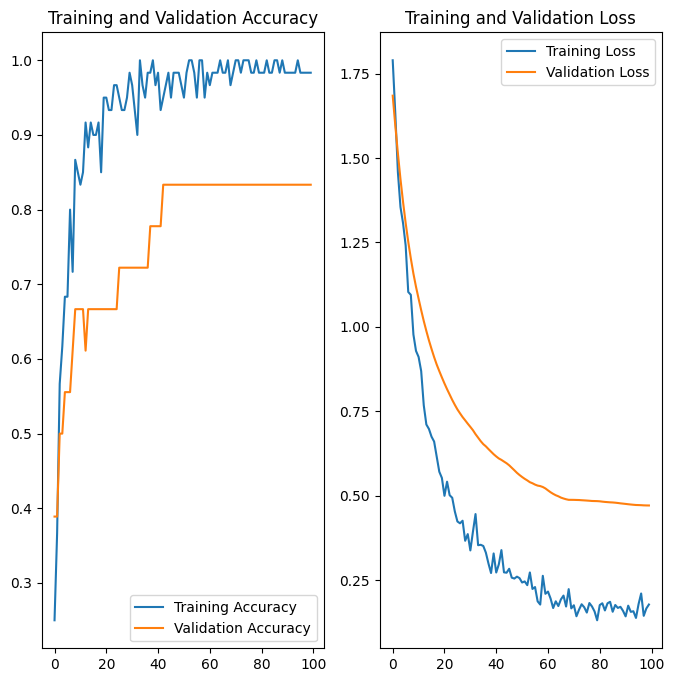

In [42]:
# Plot the training and validation accuracy and loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("saved_model/saved_model_format", include_optimizer=False)

In [ ]:
(tf. __version__)

In [ ]:
model.save("saved_model/model_saved")

In [ ]:
tf.saved_model.save(model,"saved_model/h5_format_new" )

In [ ]:
!zip -r "/content/saved_model.zip" "/content/saved_model/h5_format_new"

# Fine tune 1

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 300

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

In [ ]:
len(model.trainable_variables)

In [ ]:
fine_tune_epochs = 0
total_epochs =  initial_epochs + fine_tune_epochs
with tf.device('/GPU:0'):
  history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=[early_stopping,callback_reduce_lr])

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
# Plot the training and validation accuracy and loss at each epoch
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']

val_loss = history_fine.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

In [ ]:
!mkdir -p saved_model
history_fine.model.save('saved_model/my_model')

In [ ]:
history_fine.model.save('saved_model/my_model_h5/my_model.h5')

# fine tune 2

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 50

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

In [ ]:
fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_1 = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=[early_stopping])